reference: https://colab.research.google.com/drive/1OfNaiaLdshAGUqnCfkaJy2o66ntudVc4

# Linear Regression

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/DianCA26/Dataset/main/CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


EDA

<AxesSubplot: xlabel='highwaympg', ylabel='price'>

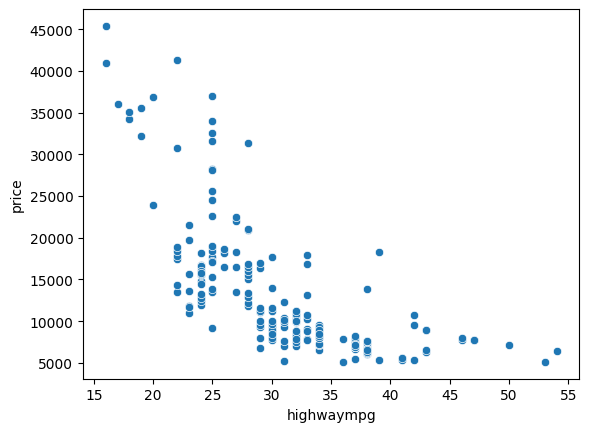

In [4]:
sns.scatterplot(x='highwaympg',y='price',data=df)

<AxesSubplot: xlabel='highwaympg', ylabel='price'>

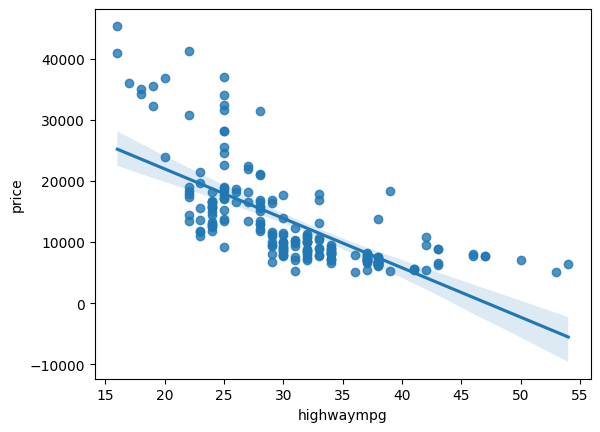

In [5]:
sns.regplot(x='highwaympg',y='price',data=df)

In [6]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
df_new= df[['highwaympg','citympg','price']]

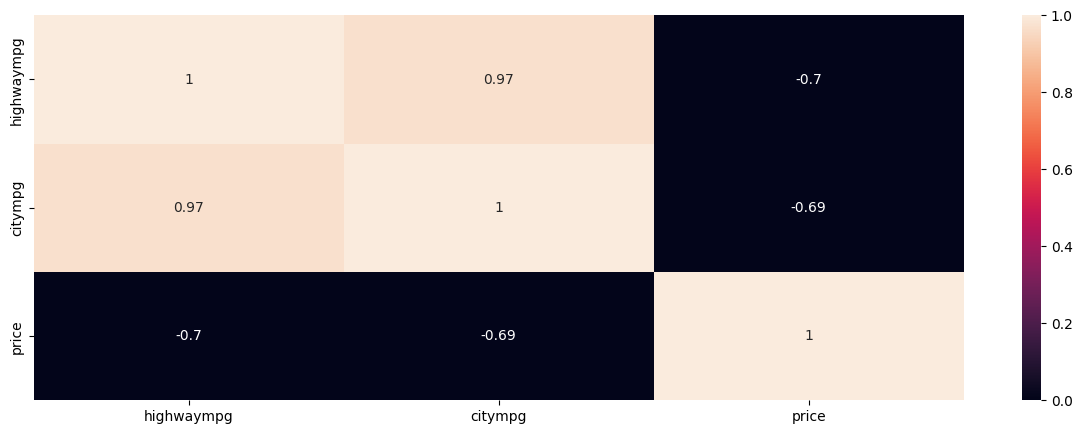

In [8]:
corr = df_new.corr()

plt.figure(figsize=(15, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

/var/folders/w9/5lrd8m1x4f586v9ynn8xrryw0000gn/T/ipykernel_68409/927514429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


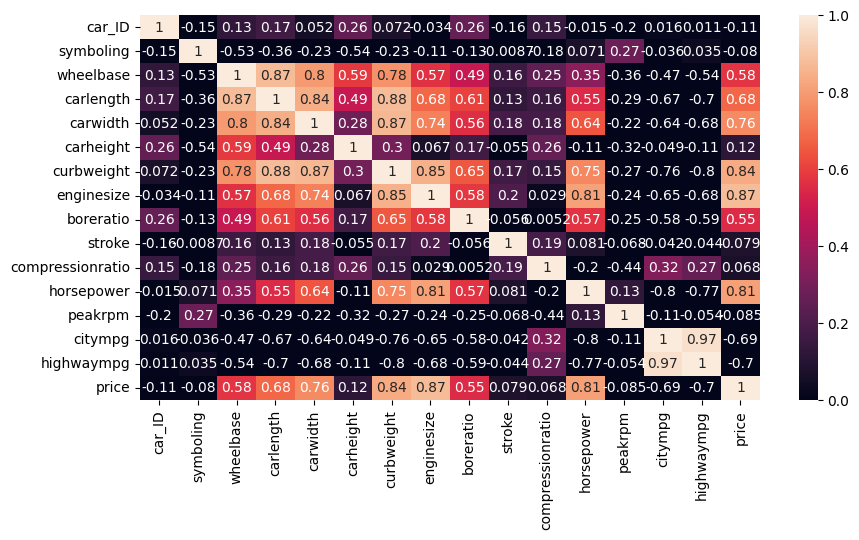

In [9]:
corr = df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

In [10]:
# pendifinisian x dan y
X = df[['highwaympg']]
y = df['price']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [12]:
# handling outlier dan missing value encoding dan scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
sc=MinMaxScaler()
sc.fit(X)
x_scaled=sc.transform(X)

In [15]:
X.shape

(205, 1)

In [16]:
X_train_surge=np.array(X)

In [17]:
x_scaled.shape

(205, 1)

In [18]:
X_final = np.concatenate([x_scaled,X], axis=1)

In [19]:
X_final.shape

(205, 2)

## Train Test Split

## Model Definition

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, )

In [21]:
X_train.shape

(164, 1)

## Train Model

In [22]:
mod=model.fit(X_train,y_train)

In [23]:
y_pred_train = mod.predict(X_train)
y_pred_test = mod.predict(X_test)

## Evaluation Model

In [24]:
np.mean(y_train)

13542.72662804878

In [25]:
np.mean(y_test)

12212.646341463415

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  4042.237533514208
MAE test =  4650.712222539548
MSE train =  32241789.311080582
MSE test =  35437549.691818856
RMSE train =  5678.185388931976
RMSE test =  5952.9446236143385
r2score train =  0.5238937441206117
r2score test =  0.2169873007062738


## Coefficients

In [27]:
mod.coef_

array([-885.05814281])

In [28]:
mod.intercept_

40412.87597597766

In [29]:
coeff_df = pd.DataFrame(mod.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
highwaympg,-885.058143


In [30]:
X.head()

,highwaympg
0,27
1,27
2,26
3,30
4,22


# Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly = PolynomialFeatures(degree=7, include_bias=False)

In [33]:
poly_features = poly.fit_transform(X_train)

In [34]:
poly_feature_test = poly.transform(X_test)

In [35]:
poly_features.shape

(164, 7)

In [36]:
X_train.shape

(164, 1)

## Model Definition & Train Model

In [37]:
poly_model = LinearRegression()
poly_model.fit(poly_features,y_train)

LinearRegression()

In [38]:
poly_predict_train = poly_model.predict(poly_features)
poly_predict_test = poly_model.predict(poly_feature_test)

In [39]:
poly_model.coef_

array([ 2.04714979e+05, -2.63118492e+04,  1.69072599e+03, -6.09517747e+01,
        1.25186179e+00, -1.36759766e-02,  6.16462014e-05])

## Evaluation Model

matrics with polynomial

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, poly_predict_train))
print('MAE test = ', mean_absolute_error(y_test, poly_predict_test))

print('MSE train = ', mean_squared_error(y_train, poly_predict_train))
print('MSE test = ', mean_squared_error(y_test, poly_predict_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, poly_predict_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, poly_predict_test)))

print('r2score train = ', r2_score(y_train, poly_predict_train))
print('r2score test = ', r2_score(y_test, poly_predict_test))

MAE train =  2915.088121668337
MAE test =  3446.002672157864
MSE train =  20621686.53145221
MSE test =  23939297.720282402
RMSE train =  4541.110715612669
RMSE test =  4892.780162676676
r2score train =  0.6954848296513769
r2score test =  0.47104767992799734


matrics with linear regression

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  4042.237533514208
MAE test =  4650.712222539548
MSE train =  32241789.311080582
MSE test =  35437549.691818856
RMSE train =  5678.185388931976
RMSE test =  5952.9446236143385
r2score train =  0.5238937441206117
r2score test =  0.2169873007062738


# Ridge Regression (L2)

In [42]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1000)

In [43]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=1000)

In [44]:
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)

## Model Evaluation

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, ridge_pred_train))
print('MAE test = ', mean_absolute_error(y_test, ridge_pred_test))

print('MSE train = ', mean_squared_error(y_train, ridge_pred_train))
print('MSE test = ', mean_squared_error(y_test, ridge_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, ridge_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, ridge_pred_test)))

print('r2score train = ', r2_score(y_train, ridge_pred_train))
print('r2score test = ', r2_score(y_test, ridge_pred_test))

MAE train =  4055.0678262397582
MAE test =  4494.187652297265
MSE train =  32741286.05090546
MSE test =  32261386.940747563
RMSE train =  5722.0001792122885
RMSE test =  5679.910821548835
r2score train =  0.5165178035260165
r2score test =  0.2871664127143104


# Lasso Regerssion (L1)

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lasso_model = Lasso()

In [48]:
lasso_model.fit(X_train,y_train)

Lasso()

In [49]:
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)

## Model Evaluation

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, lasso_pred_train))
print('MAE test = ', mean_absolute_error(y_test, lasso_pred_test))

print('MSE train = ', mean_squared_error(y_train, lasso_pred_train))
print('MSE test = ', mean_squared_error(y_test, lasso_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, lasso_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, lasso_pred_test)))

print('r2score train = ', r2_score(y_train, lasso_pred_train))
print('r2score test = ', r2_score(y_test, lasso_pred_test))

MAE train =  4042.231800253662
MAE test =  4650.675862634606
MSE train =  32241789.333159883
MSE test =  35436753.119286746
RMSE train =  5678.185390876198
RMSE test =  5952.877717481415
r2score train =  0.5238937437945723
r2score test =  0.21700490142680817


# Elastic Net (L3)

In [51]:
from sklearn.linear_model import ElasticNet

In [52]:
elastic_model = ElasticNet()

In [53]:
elastic_model.fit(X_train,y_train)

ElasticNet()

In [54]:
elastic_pred_train = elastic_model.predict(X_train)
elastic_pred_test = elastic_model.predict(X_test)

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, elastic_pred_train))
print('MAE test = ', mean_absolute_error(y_test, elastic_pred_test))

print('MSE train = ', mean_squared_error(y_train, elastic_pred_train))
print('MSE test = ', mean_squared_error(y_test, elastic_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, elastic_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, elastic_pred_test)))

print('r2score train = ', r2_score(y_train, elastic_pred_train))
print('r2score test = ', r2_score(y_test, elastic_pred_test))

MAE train =  4040.451920661408
MAE test =  4635.569831893842
MSE train =  32246028.797250323
MSE test =  35093687.10696997
RMSE train =  5678.558690129946
RMSE test =  5923.992497207434
r2score train =  0.5238311407127285
r2score test =  0.22458513896230892


# Logistic Regression

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/DianCA26/Dataset/main/mushrooms.csv')

In [57]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [58]:
X = df.drop('class',axis=1)
y = df['class']

## Train Test Split & Encoding

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [61]:
enc = OneHotEncoder()
enc.fit(X_train)

OneHotEncoder()

In [62]:
X_enc=enc.transform(X_train).toarray()
X_enc_test=enc.transform(X_test).toarray()

## Model Definition

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
log_model = LogisticRegression()

In [65]:
log_model.fit(X_enc,y_train)

LogisticRegression()

## Model Evaluation

In [66]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [67]:
y_pred_train = log_model.predict(X_enc)
y_pred_test = log_model.predict(X_enc_test)

In [68]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  1.0
accuracy score test :  1.0


In [69]:
log_model.classes_

array(['e', 'p'], dtype=object)

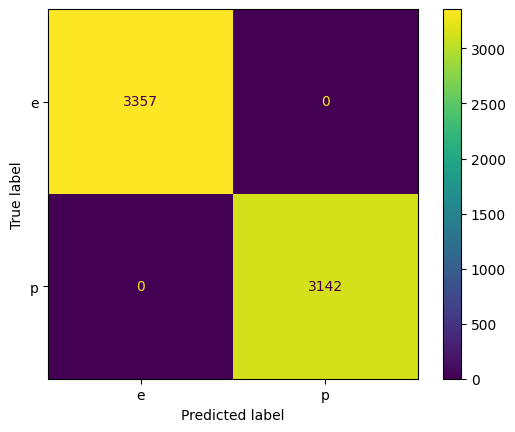

In [70]:
cm = confusion_matrix(y_train, y_pred_train, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

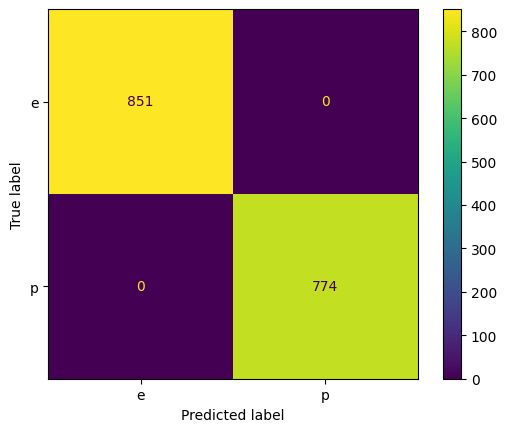

In [71]:
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [72]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [73]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      3357
           p       1.00      1.00      1.00      3142

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



# Multiclass LogReg

In [74]:
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [75]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot: xlabel='petal.length', ylabel='petal.width'>

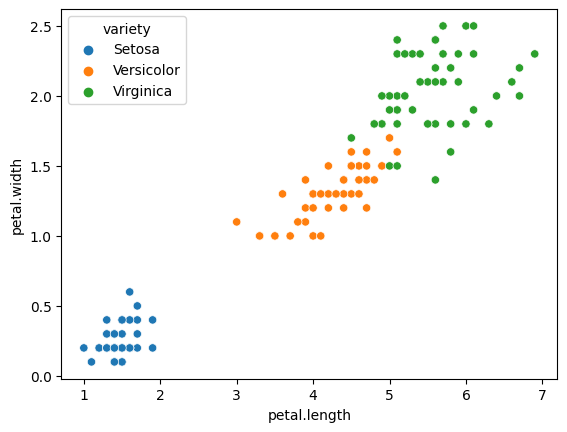

In [76]:
sns.scatterplot(x='petal.length',y='petal.width',data=df,hue='variety')

/var/folders/w9/5lrd8m1x4f586v9ynn8xrryw0000gn/T/ipykernel_68409/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

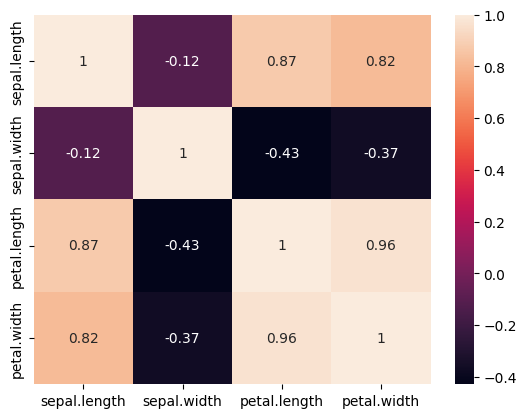

In [77]:
sns.heatmap(df.corr(),annot=True)

In [78]:
X = df.drop('variety',axis=1)
y = df['variety']

## Model Definition

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logreg_model = LogisticRegression()

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [83]:
logreg_model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
logreg_pred_train = logreg_model.predict(X_train)
logreg_pred_test = logreg_model.predict(X_test)

In [85]:
prob=logreg_model.predict_proba(X_test)

In [86]:
prob

array([[9.87282550e-01, 1.27174035e-02, 4.60288079e-08],
       [9.86050107e-01, 1.39498153e-02, 7.74187467e-08],
       [9.69061081e-01, 3.09380577e-02, 8.61722293e-07],
       [5.51337359e-05, 1.97908221e-01, 8.02036645e-01],
       [3.90127939e-03, 8.52848912e-01, 1.43249809e-01],
       [1.17949461e-03, 4.19308008e-01, 5.79512498e-01],
       [3.14037636e-03, 7.81530914e-01, 2.15328710e-01],
       [2.27589133e-02, 9.14368669e-01, 6.28724177e-02],
       [5.09810782e-04, 2.90939102e-01, 7.08551087e-01],
       [9.67202734e-01, 3.27970385e-02, 2.27489031e-07],
       [3.45918651e-04, 1.95975058e-01, 8.03679023e-01],
       [9.86416688e-01, 1.35832529e-02, 5.86501819e-08],
       [9.61211857e-01, 3.87877443e-02, 3.99207658e-07],
       [2.25399104e-07, 1.14859096e-02, 9.88513865e-01],
       [1.98405313e-03, 4.08810720e-01, 5.89205227e-01],
       [1.16314274e-02, 9.20918373e-01, 6.74501998e-02],
       [3.94177050e-02, 8.98024327e-01, 6.25579677e-02],
       [2.57454050e-02, 8.96947

In [87]:
logreg_pred_test

array(['Setosa', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor'], dtype=object)

## Evaluation Model

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [89]:
print('accuracy score train : ',accuracy_score(y_train,logreg_pred_train))
print('accuracy score test : ',accuracy_score(y_test,logreg_pred_test))

accuracy score train :  0.9642857142857143
accuracy score test :  1.0


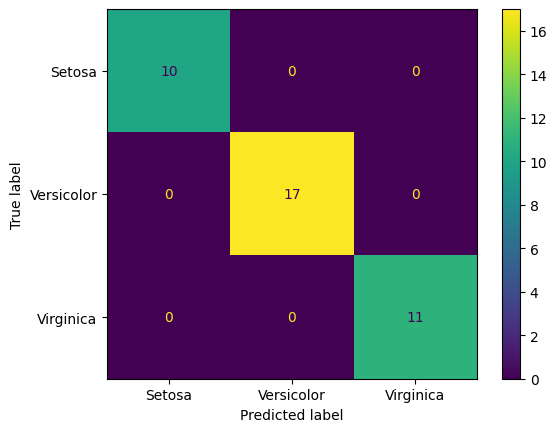

In [90]:
cm = confusion_matrix(y_test, logreg_pred_test, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

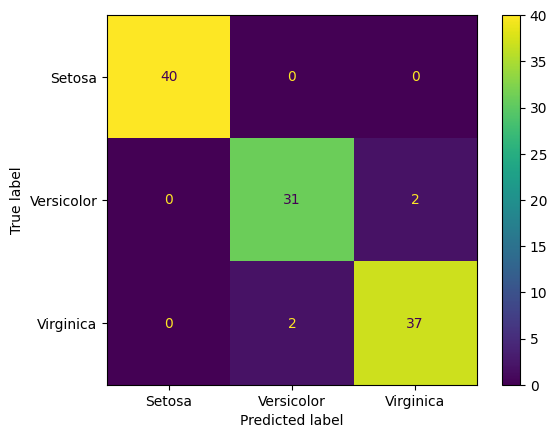

In [91]:
cm = confusion_matrix(y_train, logreg_pred_train, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

In [92]:
print(classification_report(y_train,logreg_pred_train))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        40
  Versicolor       0.94      0.94      0.94        33
   Virginica       0.95      0.95      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



Precision untuk Virginica:
95% berhasil memprediksi orang yg ada di kelas virginica dgn benar, 5 % salah prediksi (kita prediksi sebagai virginica, padahal bukan)

Recall untuk Virginica:
95% berhasil memprediksi orang yg ada di kelas virginica dgn benar, 5 % salah prediksi (kita prediksi bukan sebagai virginica, padahal harusnya dia masuk kelas virginica)

In [93]:
print(classification_report(y_test,logreg_pred_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        17
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

